In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
data = pd.read_csv("healthcare_dataset.csv")

In [127]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [128]:
newdata = data[["Age","Room Number"]]

In [129]:
newdata.head()

,Age,Room Number
0,30,328
1,62,265
2,76,205
3,28,450
4,43,458


In [130]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [131]:
encoded_data = label_encoder.fit_transform(newdata["Age"]) 

In [132]:
encoded_data2 = label_encoder.fit_transform(newdata["Room Number"]) 


In [133]:
dict = {
    "Age" : list(encoded_data),
    "Room Number":list(encoded_data2)
}

In [134]:
dict.keys()

dict_keys(['Age', 'Room Number'])

In [135]:
newComb = pd.DataFrame(dict)

In [136]:
newComb.head()

,Age,Room Number
0,17,227
1,49,164
2,63,104
3,15,349
4,30,357


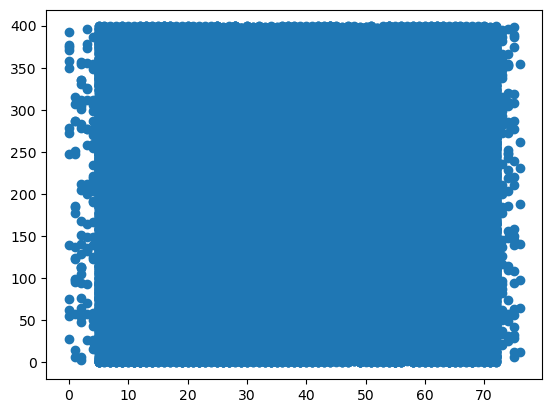

In [137]:
plt.scatter(newComb.iloc[:,0],newComb.iloc[:,1])

In [138]:
from sklearn.ensemble import IsolationForest

In [139]:
clf = IsolationForest(contamination='auto')

In [140]:
clf.fit(newComb)

IsolationForest()

In [141]:
predictions = clf.predict(newComb)

In [142]:
predictions

array([ 1,  1, -1, ...,  1,  1, -1])

In [143]:
index = np.where(predictions < 0 )
index

(array([    2,     3,     4, ..., 55490, 55493, 55499], dtype=int64),)

In [144]:
x = newComb.values

In [145]:
x

array([[ 17, 227],
       [ 49, 164],
       [ 63, 104],
       ...,
       [ 25, 246],
       [ 30, 220],
       [ 40, 347]], dtype=int64)

In [146]:
index = np.where(predictions < 0 )

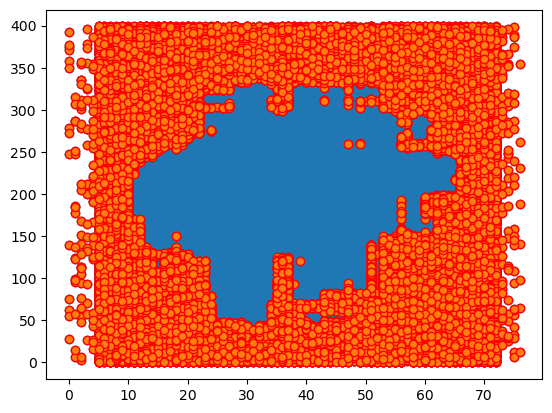

In [147]:
plt.scatter(newComb.iloc[:,0],newComb.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors='r')
